In [631]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv

# Interpolasi Menggunakan Metode Newton

## Mencari Interpolasi Polinomial Orde 9 `p_9(t)`

In [632]:
t_values = np.array([0, 60, 120, 180, 240, 300, 360, 420, 480, 540])
x_values = np.array([0, 2.73, 2.70, 2.62, 2.68, 2.68, 2.64, 2.72, 2.69, 2.55])
y_values = np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45])

In [633]:
def divided_differences(t, f):
    n = len(f)
    table = np.zeros((n, n))
    table[:, 0] = f                     # Kolom pertama adalah nilai fungsi

    for j in range(1, n):               # Iterasi kolom
        for i in range(n - j):          # Iterasi baris
            table[i, j] = (table[i + 1, j - 1] - table[i, j - 1]) / (t[i + j] - t[i])

    return table[0], table              # Tabel interpolasi dimana koefisien berada di baris pertama

In [634]:
# Hitung koefisien polinomial Newton untuk interpolasi x dan y
x9_coef, x_dd_table = divided_differences(t_values, x_values)
y9_coef, y_dd_table = divided_differences(t_values, y_values)

In [635]:
pd.DataFrame(x_dd_table)

,0,1,2,3,4,5,6,7,8,9
0,0.00,0.045500,-0.000383,2.091049e-06,-8.101852e-09,2.282665e-11,-4.524844e-14,5.882864e-17,-8.712073e-20,5.332248e-22
1,2.73,-0.000500,-0.000007,1.466049e-07,-1.253858e-09,6.537209e-12,-2.054041e-14,1.701069e-17,2.008207e-19,0.000000e+00
2,2.70,-0.001333,0.000019,-1.543210e-07,7.073045e-10,-8.573388e-13,-1.339592e-14,1.134046e-16,0.000000e+00,0.000000e+00
3,2.62,0.001000,-0.000008,1.543210e-08,4.501029e-10,-5.679870e-12,3.423402e-14,0.000000e+00,0.000000e+00,0.000000e+00
4,2.68,0.000000,-0.000006,1.234568e-07,-1.253858e-09,6.644376e-12,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
5,2.68,-0.000667,0.000017,-1.774691e-07,7.394547e-10,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
6,2.64,0.001333,-0.000015,3.576361e-22,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
7,2.72,-0.000500,-0.000015,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
8,2.69,-0.002333,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
9,2.55,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [636]:
pd.DataFrame(y_dd_table)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.083333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.0,0.083333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10.0,0.083333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15.0,0.083333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20.0,0.083333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,25.0,0.083333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,30.0,0.083333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,35.0,0.083333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,40.0,0.083333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,45.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [637]:
def evaluate_polynomial(coefficients, t_values, t_eval):
    n = len(coefficients)
    result = np.zeros_like(t_eval, dtype=float)
    for i in range(n):
        term = coefficients[i]
        for j in range(i):
            term *= (t_eval - t_values[j])
        result += term
    return result

In [638]:
t_eval = np.linspace(0, 540, 541)

x9_eval = evaluate_polynomial(x9_coef, t_values, t_eval)
y9_eval = evaluate_polynomial(y9_coef, t_values, t_eval)

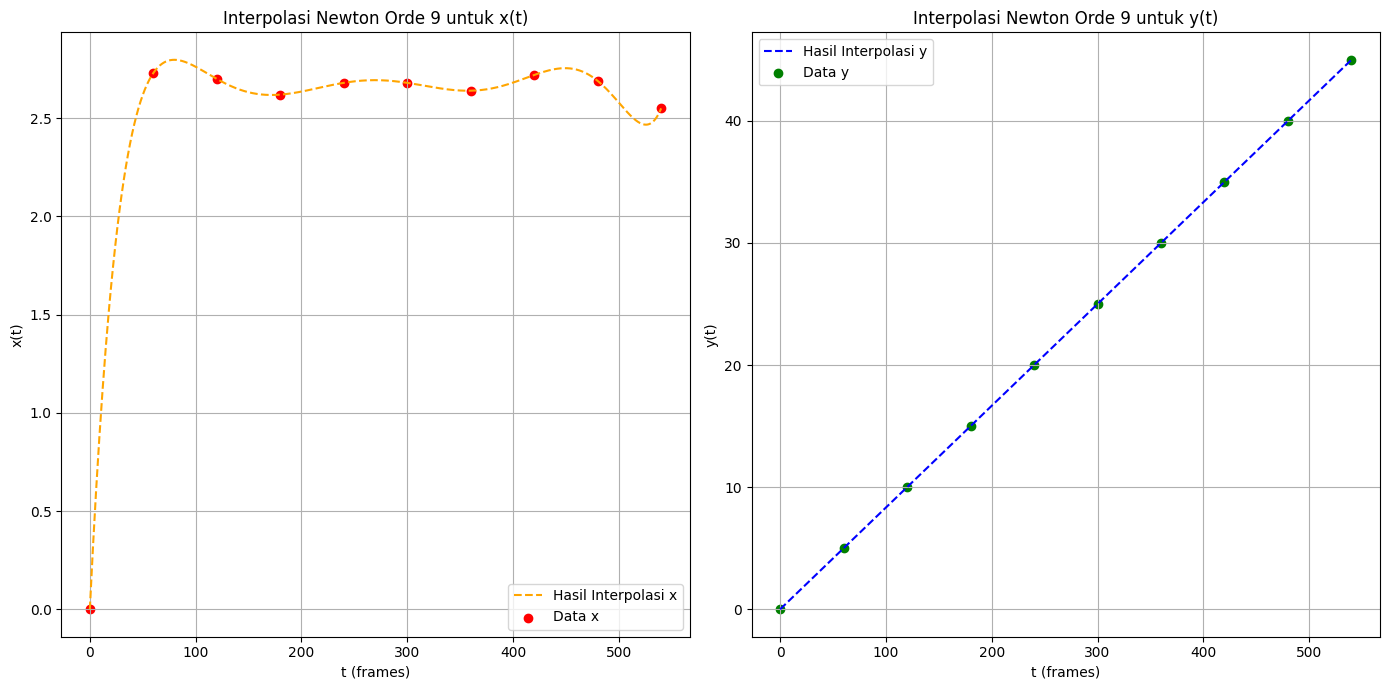

In [639]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(t_eval, x9_eval, '--', color='orange', label="Hasil Interpolasi x")
plt.scatter(t_values, x_values, color='red', label="Data x")
plt.title("Interpolasi Newton Orde 9 untuk x(t)")
plt.xlabel("t (frames)")
plt.ylabel("x(t)")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(t_eval, y9_eval, '--', color='blue', label="Hasil Interpolasi y")
plt.scatter(t_values, y_values, color='green', label="Data y")
plt.title("Interpolasi Newton Orde 9 untuk y(t)")
plt.xlabel("t (frames)")
plt.ylabel("y(t)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Mencari Interpolasi Polinomial Orde 10 `p_10(t)`

In [640]:
t_new = 600
x_new = 2.336957
y_new = 50

In [641]:
t_extended = np.append(t_values, t_new)
x_extended = np.append(x_values, x_new)
y_extended = np.append(y_values, y_new)

In [642]:
def compute_c10(t_values, t_new, f_new, dd_table):
    n   = len(t_values)
    c10 = f_new

    for j in range(1, n + 1):
        c10 = (c10 - dd_table[n - j, j - 1]) / (t_new - t_values[n - j])

    return c10

In [643]:
x10_coef = np.append(x9_coef, compute_c10(t_values, t_new, x_new, x_dd_table))
y10_coef = np.append(y9_coef, compute_c10(t_values, t_new, y_new, y_dd_table))

In [644]:
x10_eval = evaluate_polynomial(x10_coef, t_extended, t_eval)
y10_eval = evaluate_polynomial(y10_coef, t_extended, t_eval)

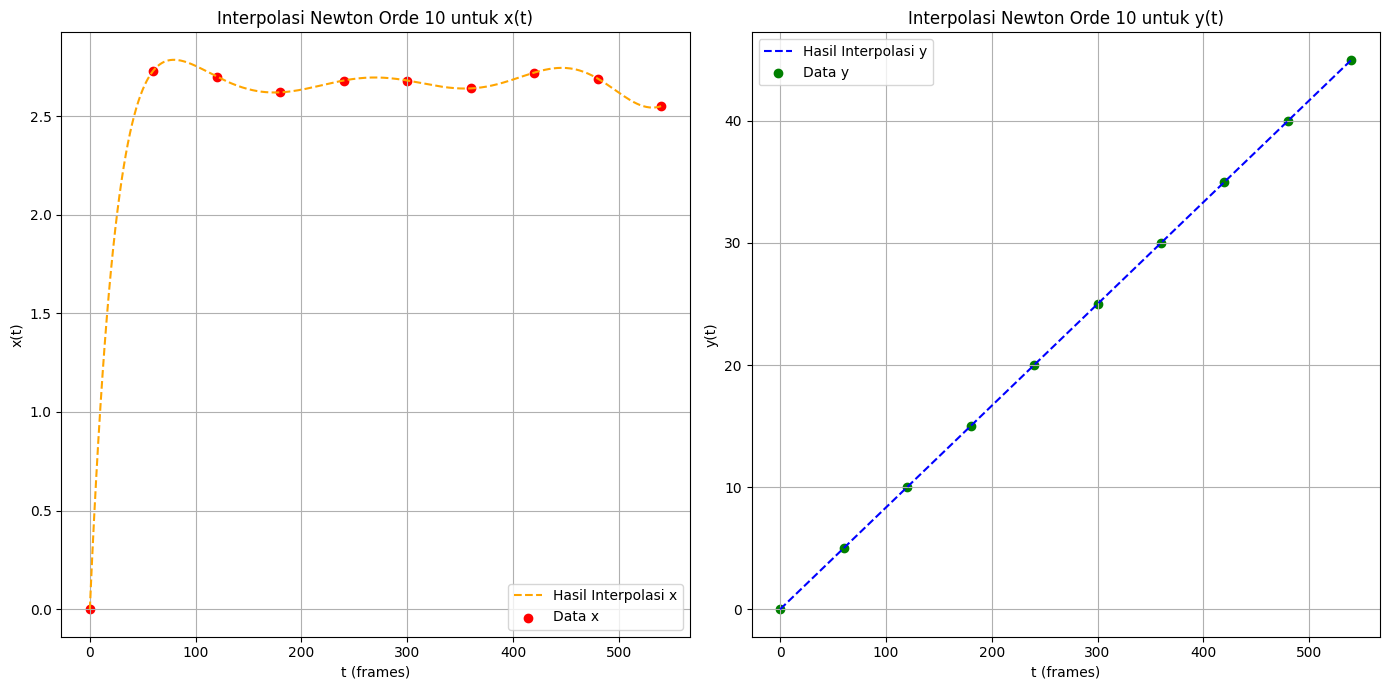

In [645]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(t_eval, x10_eval, '--', color='orange', label="Hasil Interpolasi x")
plt.scatter(t_values, x_values, color='red', label="Data x")
plt.title("Interpolasi Newton Orde 10 untuk x(t)")
plt.xlabel("t (frames)")
plt.ylabel("x(t)")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(t_eval, y10_eval, '--', color='blue', label="Hasil Interpolasi y")
plt.scatter(t_values, y_values, color='green', label="Data y")
plt.title("Interpolasi Newton Orde 10 untuk y(t)")
plt.xlabel("t (frames)")
plt.ylabel("y(t)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Visualisasi `p_9(t)` dan `p_10(t)`

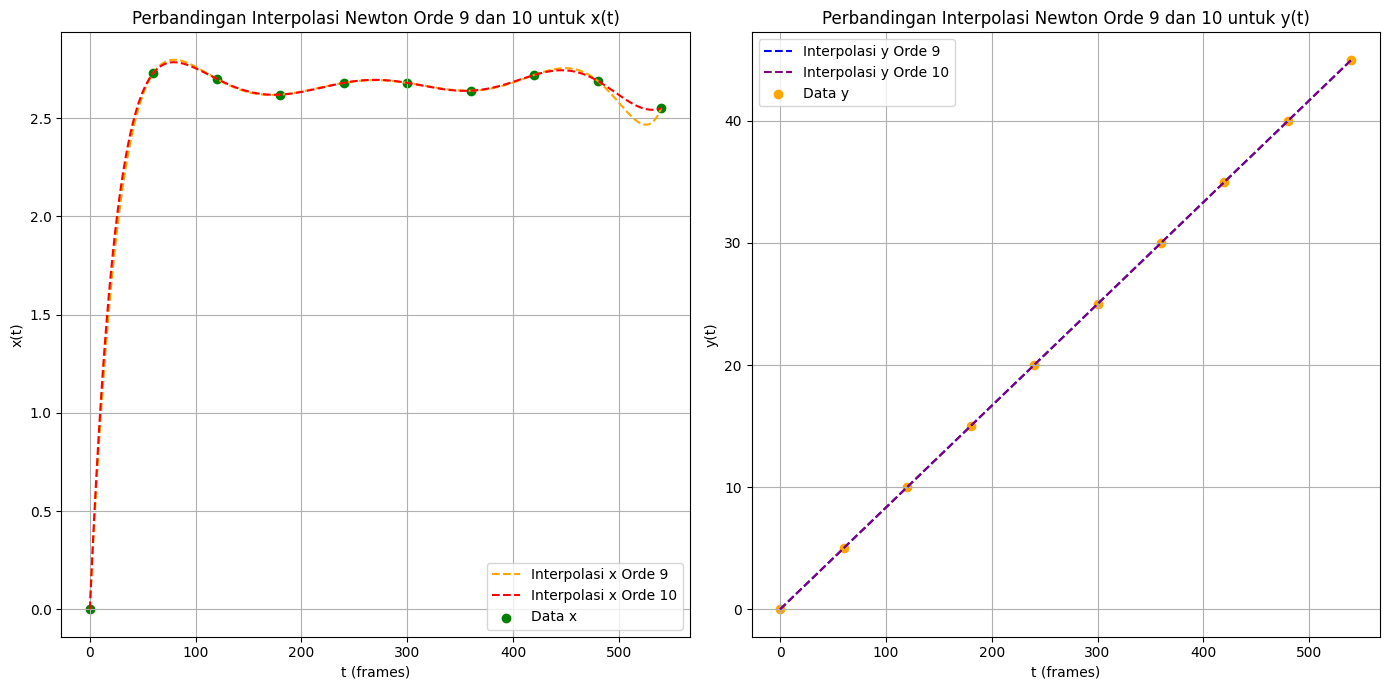

In [646]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(t_eval, x9_eval, '--', color='orange', label="Interpolasi x Orde 9")
plt.plot(t_eval, x10_eval, '--', color='red', label="Interpolasi x Orde 10")
plt.scatter(t_values, x_values, color='green', label="Data x")
plt.title("Perbandingan Interpolasi Newton Orde 9 dan 10 untuk x(t)")
plt.xlabel("t (frames)")
plt.ylabel("x(t)")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(t_eval, y9_eval, '--', color='blue', label="Interpolasi y Orde 9")
plt.plot(t_eval, y10_eval, '--', color='purple', label="Interpolasi y Orde 10")
plt.scatter(t_values, y_values, color='orange', label="Data y")
plt.title("Perbandingan Interpolasi Newton Orde 9 dan 10 untuk y(t)")
plt.xlabel("t (frames)")
plt.ylabel("y(t)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## *Export* Hasil Evaluasi `p_9(t)` dan `p_10(t)` ke dalam File `csv`

In [647]:
# Export Hasil Evaluasi Newton x p_9(t) ke CSV
with open("Evaluasi/newton_x.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerow(["t", "x(t)"])
    for i in range(len(t_eval)):
        writer.writerow([t_eval[i], x9_eval[i]])

# Export Hasil Evaluasi Newton y p_9(t) ke CSV
with open("Evaluasi/newton_y.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerow(["t", "y(t)"])
    for i in range(len(t_eval)):
        writer.writerow([t_eval[i], y9_eval[i]])